<h1 align="center"> Приоритизация гипотез и анализ результатов А/В-теста</h1>
    
Мне, как аналитику крупного интернет-магазина и отделу маркетинга поставлена задача увеличения выручки компании. Для этого мы подготовили список гипотез,  одну из которых собираемся проверить с помощью А/В-теста.

__Цель:__
* Приоритизировать гипотезы, чтобы выбрать ту, которую будем тестировать;
* Проанализировать результаты А/В-тестирования и принять решение по дальнейшим шагам.

__Варианты решений:__
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

__Порядок выполнения исследования:__

* загрузка данных, обзор и предобработка;
* приоритизация гипотез;
* анализ А/В-теста;
* формулирование итоговых выводов и рекомендаций.


<a id="1"></a>
### Загрузка данных и подготовка их к анализу

In [1]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

In [2]:
# снимем ограничение для отображения всех символов строки
pd.set_option('display.max_colwidth', None)

# снимем ограничение для отображения всех столбцов датафрейма
pd.set_option("display.max_columns", None)

In [3]:
# Загружаем исходные данные:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # датасет с заказами
    pd.read_csv('/datasets/visitors.csv'),  # датасет с посетителями
)

In [4]:
def data_review(df):
    
    ''' Функция принимает на входе датафрейм, из которого
        выводит на экран 3 первые и 3 последние строки,
        считает и выводит общее количество полных дубликатов строк,
        комбинацию символов "Id" в названии столбца заменяет на "_id",
        переводит в нижний регистр названия столбцов,
        выводит краткую сводку по получившемуся датафрейму. '''

    
    print('\033[1m' + 'Первые три строки таблицы:' + '\033[0m' + '\n', 
          df.head(3), '\n'
         )
    print('\033[1m' + 'Последние три строки таблицы:' + '\033[0m' + '\n', 
          df.tail(3), '\n'
         )
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m'
          , df.duplicated().sum(), '\n', '\n'
          , '\033[1m' + 'Краткая сводка:' + '\033[0m'
         )
    df.columns = [name.replace('Id', '_id') for name in df.columns]
    df.columns = df.columns.str.lower()
    df.info()

In [5]:
data_review(hypothesis)

Первые три строки таблицы:
                                                                                                      Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3   

Последние три строки таблицы:
                                                                                              Hypothesis  \
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
7      Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 

С датафреймом по гипотезам все нормально.

Смотрим следующий датафрейм с заказами:

In [6]:
data_review(orders)

Первые три строки таблицы:
    transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A 

Последние три строки таблицы:
       transactionId   visitorId        date  revenue group
1194     1807773912   573423106  2019-08-14    10550     A
1195     1947021204  1614305549  2019-08-14      100     A
1196     3936777065  2108080724  2019-08-15   202740     B 

Количество дубликатов в таблице: 0 
 
 Краткая сводка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: 

Здесь нужно привести столбец date к типу datetime.

Смотрим третий датафрейм с посетителями интернет-магазина:

In [7]:
data_review(visitors)

Первые три строки таблицы:
          date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507 

Последние три строки таблицы:
           date group  visitors
59  2019-08-29     B       531
60  2019-08-30     B       490
61  2019-08-31     B       718 

Количество дубликатов в таблице: 0 
 
 Краткая сводка:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Здесь также необходимо преобразовать столбец с датами.

Скорректируем формат столбцов date:

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

В данном разделе мы загрузили исходные датасеты, проверили строки в них на дублирование, привели названия столбцов к единому виду, столбцы с датами конвертировали в формат **datetime**.

<a id="2"></a>
### Часть 1. Приоритизация гипотез

Выведем на экран полностью таблицу с гипотезами и их параметрами, которые были оценены по десятибальной шкале:

In [9]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Мы видим несколько параметров: Reach - охват, Impact - влияние, Confidence - уверенность, Efforts - усилия. Используя эти параметры, мы можем расположить гипотезы в порядке их важности для улучшения ключевых метрик бизнеса.

#### Приоритизация гипотез с помощью фреймворка ICE

Данный метод приоритизации использует следующую формулу для определения ранга гипотезы:

$$\text{ICE SCORE} = \frac{Impact\cdot Confidence}{Efforts}$$

In [10]:
# Добавим к таблице новый столбец, вычислив значения для него по формуле для ICE:
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [11]:
# Выведем таблицу с новым столбцом, отсортировав по нему в порядке убывания, а также сбросим индексы:
hypothesis = hypothesis.sort_values(by='ice', ascending=False, ignore_index=True)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
0,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Наилучший ранг получила гипотеза о скидке ко дню рождения. Но, наш метод расчета не учитывает размер аудитории, которую он охватывает. Например, победившая гипотеза затрагивает каждый день в среднем только одного из 365 посетителей интернет-магазина. Кроме того, для ее реализации необходимо получить от покупателя достаточно чувствительную личную информацию (дату рождения), и чтобы нивелировать этот фактор, придется увеличивать процент предлагаемой скидки.

#### Приоритизация гипотез с помощью фреймворка RICE

Формула для данного метода приоритизации:

$$\text{RICE SCORE} = \frac{Reach\cdot Impact\cdot Confidence}{Efforts}$$

Далее выполним несколько шагов, чтобы получить в итоге ранжированную по методу RICE таблицу с указанием изменения ранга по сравнению с предыдущим методом:

In [12]:
# Добавим к таблице новый столбец, вычислив значения для него по формуле для RICE:
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [13]:
# Сортируем по RICE
hypothesis_sorted = hypothesis.sort_values(by='rice', ascending=False)

In [14]:
# Добавляем колонку с изменением позиции
hypothesis_sorted['rank_change'] = hypothesis_sorted.index - hypothesis.index

In [15]:
# Добавляем плюсики к положительным значениям
hypothesis_sorted['rank_change'] = hypothesis_sorted['rank_change'].apply(lambda x: f"+{x}" if x > 0 else str(x))

In [16]:
# Функция для окрашивания значений
def color_positions(val):
    if val == '0':
        return ''
    color = 'green' if '+' in val else 'red'
    return f'color: {color}'

In [17]:
def bold_text(val):
    return 'font-weight: bold'

In [18]:
hypothesis_rank = (hypothesis_sorted[['hypothesis', 'rank_change', 'ice', 'rice']]
             .reset_index(drop=True)
             .style
             .applymap(color_positions, subset=['rank_change'])
             .applymap(bold_text, subset=['rank_change'])
             .format({'ice': '{:.3f}', 'rice': '{:.1f}'})
)

hypothesis_rank

,hypothesis,rank_change,ice,rice
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",+2,11.200,112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",+3,7.000,56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",-1,13.333,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",0,8.000,40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",-4,16.200,16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",+2,1.125,9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",-1,2.000,4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",-1,1.333,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",0,1.000,3.0


Как раз победитель из предыдущего метода приоритизации сильно ухудшил свой ранг (на 4 позиции) из-за низкого охвата аудитории. А здесь лидирует гипотеза с максимальным параметром охвата посетителей интернет-магазина. Это гипотеза о добавлении формы подписки на все основные страницы для формирования базы клиентов для email-рассылок.  
В целом, гипотезы, имеющие больший охват аудитории улучшили свой приоритет, а имеющие меньший охват - ухудшили.

<a id="3"></a>
### Часть 2. Анализ А/В-теста

У нас есть результаты А/В-теста, которые предстоит проанализировать. Но, вообще говоря, мы должны были сначала провести А/А-эксперимент и посмотреть, все ли критерии успешного эксперимента были соблюдены. Среди таких критериев:
* количество пользователей в двух выделенных группах совпадает с точностью до 1%;
* данные в ходе эксперимента собираются корректно;
* показатели ключевых метрик в двух выделенных группах совпадают с точностью до 1%;
* инструмент "деления" пользователей на группы отработал корректно, не допустив "миграции" пользователей между группами.

Корректность сбора данных и равенство показателей ключевых метрик в А/А-тесте нам остается принять на веру. А вот совпадение размера выборок и насколько успешно пользователи были разделены на контрольную и тестовую группы, мы сейчас проверим, используя результаты А/В-тестирования.

#### Проверка критериев А/А-теста

Совпадение размеров групп проверим с датафреймом visitors

In [19]:
# Посчитаем сумму пользователей по двум группам
grouped = visitors.groupby('group')['visitors'].sum()

# Вычислим относительную разницу между группами
round((1 - grouped['A'] / grouped['B'])*100, 3).astype(str) + '%'

'0.952%'

Количество пользователей в группах **А** и **В** отличается менее, чем на **1%**, что вполне нас устраивает.

Теперь проверим, как отработал инструмент "деления" трафика. Для этого необходимо идентифицировать каждого пользователя по **id**. Такая информация есть только в датафрейме orders, который содержит данные только по пользователям сделавшим  заказ:

In [20]:
# Отфильтруем строки по группе А
group_A = orders[orders['group']=='A']['visitor_id']

# Отфильтруем строки по группе В
group_B = orders[orders['group']=='B']['visitor_id']

# Получим список значений 'visitor_id', которые попали в обе группы
A_and_B = set(group_A).intersection(set(group_B))

# Посмотрим на длину этого списка
len(A_and_B)

58

Увы. Получился довольно большой список пользователей, которые попали в обе группы, контрольную и экспериментальную. Мы можем посчитать долю покупателей, ошибочно попавших в обе группы, но как это соотносится с общим числом посетителей интернет-магазина точно сказать нельзя. Можем лишь предположить, что наш инструмент деления трафика для всех пользователей в среднем ошибается с той же вероятностью, что и для пользователей, сделавших заказ. Можно, конечно, немного усложнить себе задачу, и посчитать доли ошибочных заказов для каждой даты и группы отдельно, чтобы потом вычесть соответствующие доли для посетителей в таблице **visitors**. Но вряд ли эта излишняя аккуратность имеет смысл, когда точными данными мы не располагаем.  
Скорректируем число посетителей в соответствии с полученной долей ошибочных заказов:

In [21]:
# Число ошибочных заказов
a = len(orders[orders['visitor_id'].isin(A_and_B)])

# Общее число заказов
b = len(orders)

In [22]:
# Процент ошибочных заказов
a/b

0.15121136173767752

Примерно **15%** заказов было сделано пользователями, ошибочно распределенными сразу в две группы.

Добавим столбец в таблицу **visitors** с уменьшенным на **15%** числом посетителей интернет-магазина:

In [23]:
visitors['visitors_corrected'] = visitors['visitors'] - visitors['visitors'] * a // b

In [24]:
visitors.head()

,date,group,visitors,visitors_corrected
0,2019-08-01,A,719,611
1,2019-08-02,A,619,526
2,2019-08-03,A,507,431
3,2019-08-04,A,717,609
4,2019-08-05,A,756,642


Мы получили новые данные для размеров групп, но, поскольку мы уменьшили их на равную долю, снова проверять критерий равенства выборок смысла не имеет - мы получим ту же разницу около **1%**.

Итак, мы получили, что инструмент деления трафика посетителей интернет-магазина в **15%** случаев ошибся. В результате был скорректирован датафрейм **visitors**.  
Давайте также внесем изменения и в таблицу заказов, отфильтровав строки с ошибочными значениями **visitor_id**:

In [25]:
orders_corrected = orders[~orders['visitor_id'].isin(A_and_B)]

Чтобы завершить этот блок корректировки таблицы заказов, проверим на дублирование столбец с идентификаторами заказов, на всякий случай:

In [26]:
orders_corrected['transaction_id'].value_counts().head()

3628490752    1
290089453     1
1108180333    1
446569841     1
3167192434    1
Name: transaction_id, dtype: int64

Здесь порядок.  
Также, можно поискать дубликаты из комбинации нескольких столбцов. Например, если один и тот же пользователь делает больше одного заказа на одинаковую сумму в один день, это выглядит довольно подозрительно:

In [27]:
orders_corrected[orders_corrected.duplicated(subset=['visitor_id', 'date', 'revenue'], keep=False)]

,transaction_id,visitor_id,date,revenue,group
556,571224785,3941503500,2019-08-06,4990,B
558,3621273697,3941503500,2019-08-06,4990,B


Возможно, произошла накладка. Оставим только одну покупку из двух:

In [28]:
orders_corrected = orders_corrected.drop(index=558)

In [29]:
orders_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1015 non-null   int64         
 1   visitor_id      1015 non-null   int64         
 2   date            1015 non-null   datetime64[ns]
 3   revenue         1015 non-null   int64         
 4   group           1015 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


#### Проверка размера выборки и длительности теста

Воспользуемся онлайн-калькулятором, чтобы  убедиться, что размер выборок достаточен для достижения статистической значимости изменений. Посчитаем значения конверсии для контрольной и тестовой группы пользователей:

In [30]:
conversion_control = (len(orders_corrected[orders_corrected['group']=='A'])/
                      visitors[visitors['group']=='A']['visitors'].sum())
conversion_control

0.02497865072587532

In [31]:
conversion_test = (len(orders_corrected[orders_corrected['group']=='B'])/
                      visitors[visitors['group']=='B']['visitors'].sum())
conversion_test

0.028917318672023684

Относительное изменение конверсии:

In [32]:
(conversion_test - conversion_control) / conversion_control

0.15768137316033282

При исходной конверсии **2.5%**, относительном ее изменении на **15,77%**, мощности теста в **80%** и уровне значимости в **5%** вычисление размера каждой группы на калькуляторе https://www.evanmiller.org/ab-testing/sample-size.html дает значение **25176**. Т.е. в сумме для групп А и В необходимо иметь **50 тысяч 352 посетителя**.  
В нашем эксперименте всего задействовано:

In [33]:
visitors['visitors'].sum()

37652

Около **37 тысяч 652 пользователя**. Этого недостаточно. Согласно онлайн-сервису мы в своем эксперименте не достигли минимально необходимого размера выборки, чтобы говорить о статистически значимом улучшении конверсии. Поэтому, есть необходимость продолжить тест.

Попробуем также графически изучить вопрос о необходимости продолжения эксперимента, например, посмотреть на графике, насколько быстро происходит стабилизация значений конверсии. Для этого, сначала построим график конверсии по дням, для контрольной и тестовой группы:

In [34]:
# Посчитаем число заказов по датам и группам в таблице заказов:
orders_grouped = orders_corrected.groupby(['group', 'date'])['transaction_id'].count().reset_index()

# Объединим две таблицы:
merged = (orders_grouped
                .merge(visitors[['date', 'group', 'visitors']]
                       , left_on=['date', 'group']
                       , right_on=['date', 'group']
                       , how='left')
               )

# Добавим столбец с конверсией по датам и группам:
merged['conversion'] = merged['transaction_id'] / merged['visitors']
merged.head()

,group,date,transaction_id,visitors,conversion
0,A,2019-08-01,23,719,0.031989
1,A,2019-08-02,19,619,0.030695
2,A,2019-08-03,24,507,0.047337
3,A,2019-08-04,11,717,0.015342
4,A,2019-08-05,22,756,0.029101


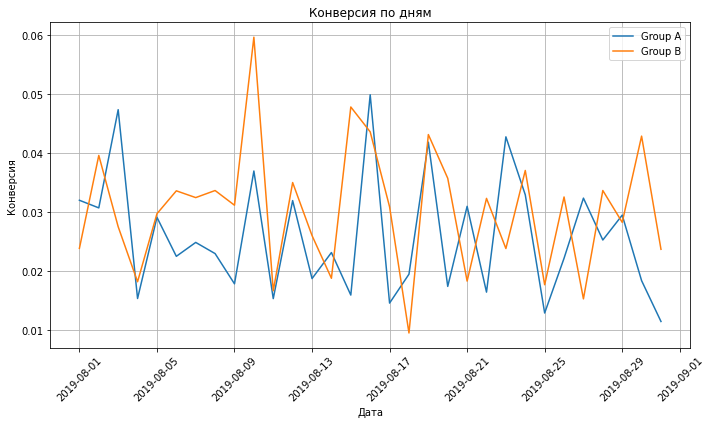

In [35]:
plt.figure(figsize=(10, 6))

for group in merged['group'].unique():
    group_data = merged[merged['group'] == group]
    plt.plot(group_data['date'], group_data['conversion'], label=f'Group {group}')

plt.title('Конверсия по дням')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Полученный график не дает возможности сравнить конверсии в двух группах.  
Попробуем построить график кумулятивной средней конверсии, т.е. для каждой даты в двух группах посчитаем среднюю конверсию на базе накопленных к данному дню данных с момента начала эксперимента:

In [36]:
# Посчитаем кумулятивное число заказов по датам и группам в таблице заказов:
orders_cumsum = orders_corrected.groupby(['group', 'date'])['transaction_id'].count().cumsum().reset_index()

# Добавим столбец с кумулятивным числом посетителей в visitors:
visitors['visitors_cumsum'] = visitors['visitors'].cumsum()

# Объединим две таблицы:
merged_table = (orders_cumsum
                .merge(visitors[['date', 'group', 'visitors_cumsum']]
                       , left_on=['date', 'group']
                       , right_on=['date', 'group']
                       , how='left')
               )

# Добавим столбец с кумулятивной конверсией по датам и группам:
merged_table['conversion'] = merged_table['transaction_id'] / merged_table['visitors_cumsum']
merged_table.head()

,group,date,transaction_id,visitors_cumsum,conversion
0,A,2019-08-01,23,719,0.031989
1,A,2019-08-02,42,1338,0.031390
2,A,2019-08-03,66,1845,0.035772
3,A,2019-08-04,77,2562,0.030055
4,A,2019-08-05,99,3318,0.029837


Построим график кумулятивной средней конверсии и добавим на него уровни средней конверсии, которые мы получили выше для контрольной и тестовой группы:

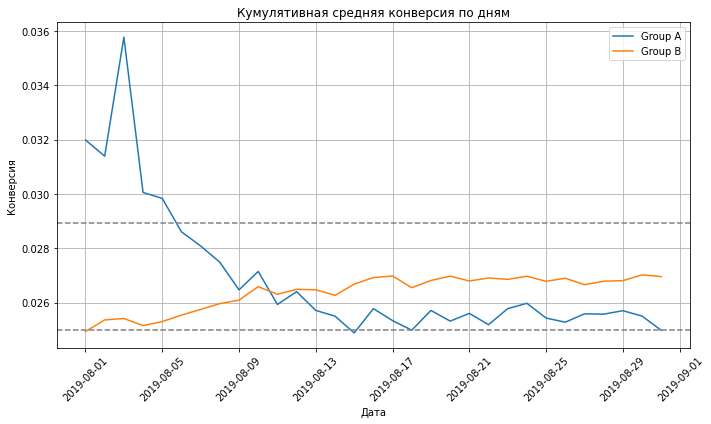

In [37]:
plt.figure(figsize=(10, 6))

for group in merged_table['group'].unique():
    group_data = merged_table[merged_table['group'] == group]
    plt.plot(group_data['date'], group_data['conversion'], label=f'Group {group}')

plt.title('Кумулятивная средняя конверсия по дням')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.axhline(y=0.028917318672023684, color='grey', linestyle='--')
plt.axhline(y=0.02497865072587532, color='grey', linestyle='--')

plt.show()

График накопительной средней конверсии также сигнализирует нам о том, что данных не хватило. Казалось бы, уровень конверсии в группах стабилизировался примерно через две недели от начала эксперимента. Но, если для контрольной группы эта стабилизация произошла рядом со средним показателем конверсии (**0.025 - 0.026**) в группе, то для тестовой группы уровень накопленной средней конверсии (**0.027**) не достиг среднего уровня (**0.029**) по группе. Т.е. график подтверждает сделанный выше вывод, что данных не достаточно.  

При условии, что в эксперименте был задействован весь трафик, увеличить количество данных можно только путем продления эксперимента.  
Воспользуемся онлайн-сервисом https://vwo.com/tools/ab-test-duration-calculator/ для вычисления продолжительности А/В-теста.
Здесь, помимо значений конверсии нам понадобится суммарное среднее в день число посетителей интернет-магазина:

In [38]:
visitors.groupby('date')['visitors'].sum().mean()

1214.5806451612902

При среднем числе посещений **1215** в сутки, существующей конверсии **2.5%** и прогнозируемом улучшении конверсии на **15.77%**, мы получили **41 день** для необходимой продолжительности А/В-теста. Т.е. эксперимент нужно продолжить еще на **10 дней**.  
Такой же вывод по длительности теста можно было получить и не применяя данный калькулятор, а просто поделив  общее необходимое число посетителей, примерно **50 тысяч**, на среднее число посетителей в день - **1200**.

Чтобы нагляднее увидеть разницу между группами, можно построить график относительного различия конверсий:

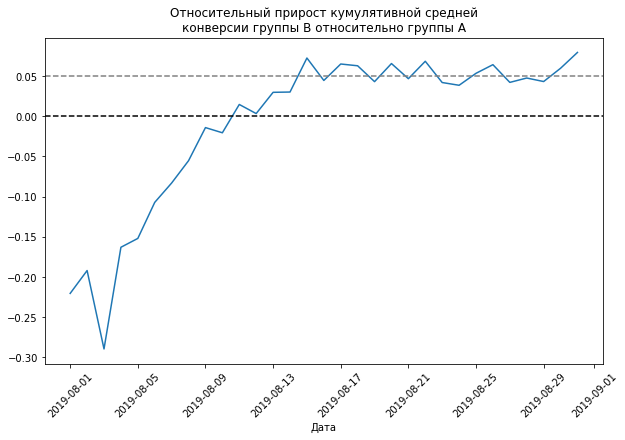

In [39]:
merged_table_A = merged_table[merged_table['group'] == 'A']
merged_table_B = merged_table[merged_table['group'] == 'B']
merged_A_B = (merged_table_A[['date','conversion']]
              .merge(merged_table_B[['date','conversion']]
                     , left_on='date'
                     , right_on='date'
                     , how='left'
                     , suffixes=['A', 'B'])
             )

plt.figure(figsize=(10, 6))

plt.plot(merged_A_B['date']
         , merged_A_B['conversionB']/merged_A_B['conversionA']-1)

plt.title("Относительный прирост кумулятивной средней\nконверсии группы B относительно группы A")
plt.xlabel('Дата')


plt.xticks(rotation=45)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.05, color='grey', linestyle='--');

Мы видим, что группа **В** примерно на 10-11 день эксперимента стала показывать конверсию стабильно выше, чем в группе **А**. Кроме того, в самом конце теста видна возможная тенденция к увеличению преимущества группы **В**. Таким образом,  было бы неплохо посмотреть, что будет происходить с этой метрикой дальше..

#### Проверка гипотезы о равенстве долей

Мы можем, также, использовать статистический подход для сравнения конверсий (доли пользователей, сделавших заказ) в группах **А** и **В**.

**Нулевая гипотеза**: конверсии равны.  
**Альтернативная гипотеза**: между конверсиями есть значимая разница.

In [40]:
alpha = .05 # критический уровень статистической значимости

successes = (np.array([len(orders_corrected[orders_corrected['group']=='A'])
                       , len(orders_corrected[orders_corrected['group']=='B'])])
            )
trials = (np.array([visitors[visitors['group']=='A']['visitors'].sum()
                    , visitors[visitors['group']=='B']['visitors'].sum()])
         )

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

In [41]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

In [42]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.018303994456679407
Отвергаем нулевую гипотезу: между долями есть значимая разница


Существует статистически значимая разница между конверсиями для двух выборок.

#### Подготовка данных для анализа А/В-теста

In [43]:
# Подготовим датафрейм с количеством пользователей в группе А для каждой даты:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Подготовим датафрейм с количеством пользователей до выбранной даты включительно в группе А:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Подготовим датафрейм с количеством пользователей в группе В для каждой даты:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Подготовим датафрейм с количеством пользователей до выбранной даты включительно в группе В:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Подготовим датафрейм с количеством заказов и суммарной выручкой в выбранную дату в группе А:
ordersADaily = (
    orders_corrected[orders_corrected['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Подготовим датафрейм с суммарным числом заказов и суммарной выручкой до выбранной даты включительно в группе А:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Подготовим датафрейм с количеством заказов и суммарной выручкой в выбранную дату в группе В:
ordersBDaily = (
    orders_corrected[orders_corrected['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Подготовим датафрейм с суммарным числом заказов и суммарной выручкой до выбранной даты включительно в группе В:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем число заказов для пользователей, сделавших хотя бы один заказ:

In [44]:
ordersByUsersA = (
    orders_corrected[orders_corrected['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders_corrected[orders_corrected['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

#### График кумулятивной выручки по группам

In [45]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_corrected[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders_corrected[np.logical_and(orders_corrected['date'] <= x['date']
                                                                     , orders_corrected['group'] == x['group'])]
                           .agg({'date' : 'max'
                                 , 'group' : 'max'
                                 , 'transaction_id' : 'nunique'
                                 , 'visitor_id' : 'nunique'
                                 , 'revenue' : 'sum'})
                           , axis=1)
                    .sort_values(by=['date','group'])
                   )

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                               , visitors['group'] == x['group'])]
                             .agg({'date' : 'max'
                                   , 'group' : 'max'
                                   , 'visitors' : 'sum'})
                             , axis=1)
                      .sort_values(by=['date','group'])
                     )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


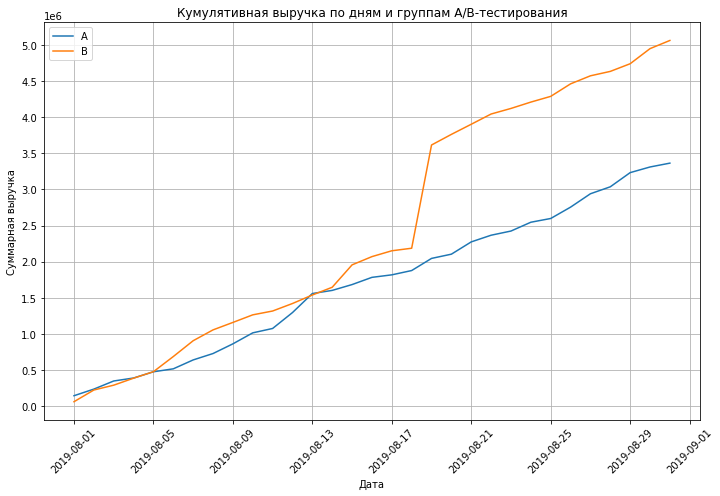

In [46]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 7))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам А/В-тестирования')
plt.xlabel('Дата')
plt.ylabel('Суммарная выручка')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(0, 5500000, 500000))

plt.show();

Мы видим, что кумулятивная выручка группы **А** имеет линейную зависимость. График группы **В** почти не отличается от первого графика вплоть до 18 августа, когда происходит резкий одномоментный рост кумулятивной выручки. Причиной такого роста мог стать очень дорогой заказ, сделанный 19 августа, либо аномально большое число заказов в этот день.

#### График кумулятивного среднего чека по группам

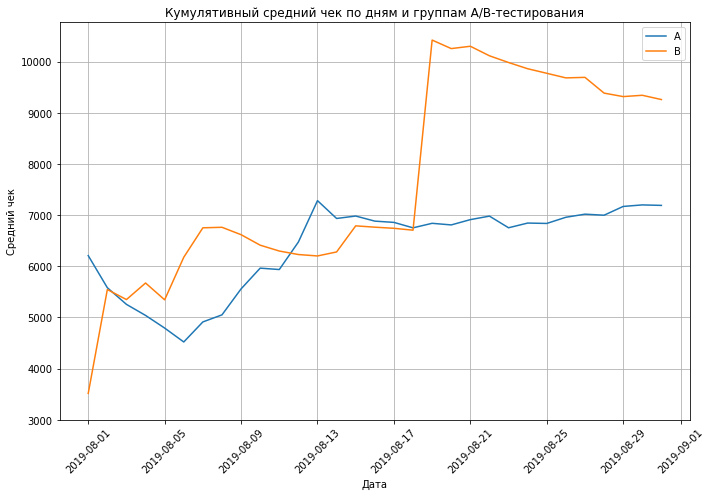

In [47]:
plt.figure(figsize=(10, 7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по дням и группам А/В-тестирования')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(3000, 11000, 1000))

plt.show();

Мы видим, что для группы **А** средний чек после 13 августа установился в районе отметки **7000**. А резкий рост графика группы **В** 19 августа повторил всплеск, полученный на предыдущем графике. И теперь мы понимаем, что дело не в увеличении количества заказов в этот день, а в очень дорогом заказе. После 19-го августа график **В**, видимо, вернулся к обычным показателям для среднего чека, что выражается в постепенном снижении значений накопленных данных. График группы **В** пока далек от стабилизации, а значит эксперимент необходимо продолжить.

#### График относительного изменения кумулятивного среднего чека группы В к группе А

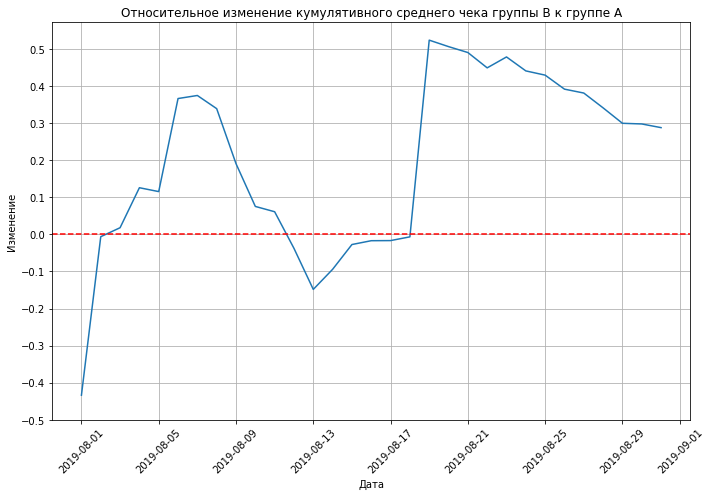

In [48]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB
                                                    , left_on='date'
                                                    , right_on='date'
                                                    , how='left'
                                                    , suffixes=['A', 'B'])
                          )

plt.figure(figsize=(10, 7))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(-0.5, 0.6, 0.1))

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.show();

Мы видим, что тестовая группа **В** уходит то в "плюс", то в "минус", относительно контрольной группы **А**. И, вроде бы, к концу эксперимента группа **В** выигрывает эту битву, но уверенности нет, т.к. мы знаем, что 19 августа был крупный заказ. Необходимо исключить его влияние и построить график еще раз.

#### График кумулятивного среднего количества заказов на посетителя по группам

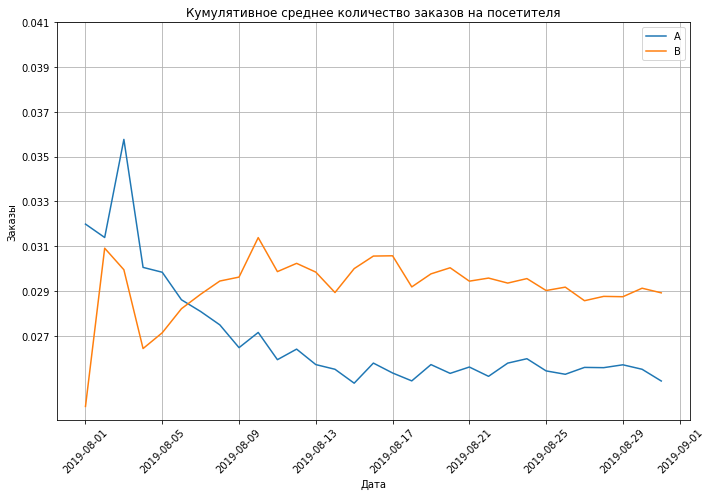

In [49]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 7))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Заказы')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(0.027, 0.043, 0.002))

plt.show();

Среднее число заказов на посетителя очень нестабильно, поэтому вначале мы видим сильные колебания значений в двух группах. Но, по мере накопления данных, метрика стабилизировалась, при этом в группе **А** значения стали стабильно ниже, чем в группе **В**. Правда, стоит отметить, что группа **В** демонстрирует тенденцию к небольшому снижению. А значит, необходимо и дальше снимать данные до полной стабилизации метрики в данной группе.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А

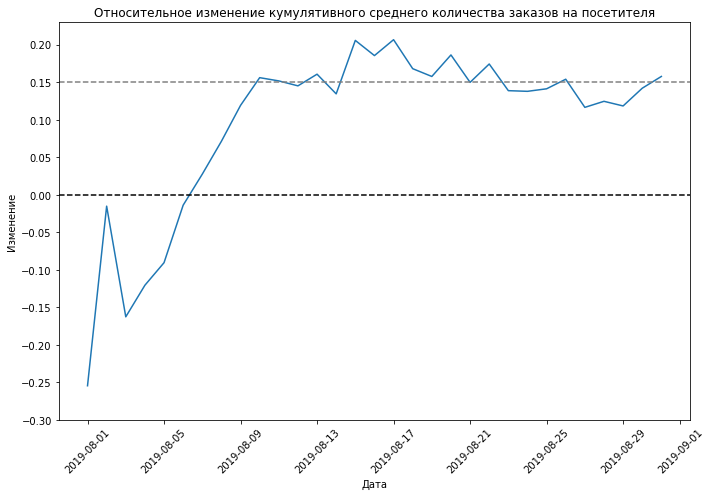

In [50]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']]
                                      , left_on='date'
                                      , right_on='date'
                                      , how='left'
                                      , suffixes=['A', 'B'])
                              )

plt.figure(figsize=(10, 7))

(plt.plot(mergedCumulativeConversions['date']
          , mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')


plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Изменение')

plt.grid(False)
plt.xticks(rotation=45)
plt.yticks(np.arange(-0.3, 0.25, 0.05))
plt.tight_layout()

plt.show();

Поначалу, группа **В** проигрывала группе **А**, но затем стала доминировать. Мы видим, что метрика имеет тенденцию к стабилизации на уровне **15%**. Выше мы уже видели похожее значение для относительного изменения кумулятивной конверсии пользователей, когда выполняли проверку размера выборки и длительности эксперимента.

#### Точечный график количества заказов по пользователям

In [51]:
# Сгруппируем данные по пользователям и посчитаем количество заказов, которые они сделали:
ordersByUsers = orders_corrected.groupby('visitor_id', as_index=False).agg({'transaction_id': 'count'})

# Переименуем столбцы:
ordersByUsers.columns = ['visitor_id', 'orders']

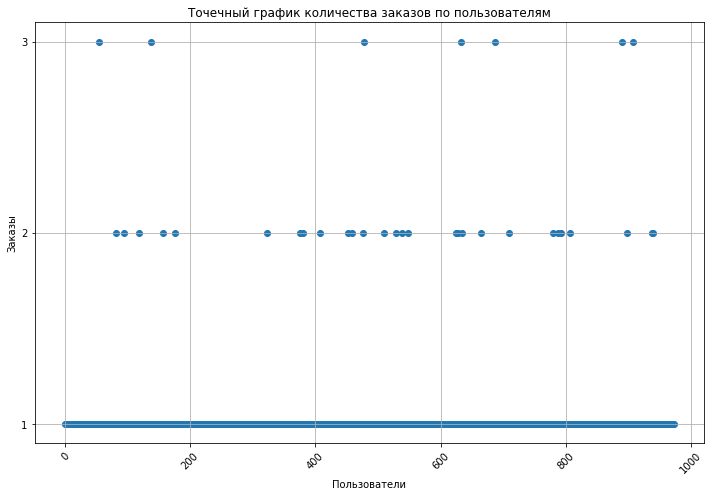

In [52]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10, 7))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(np.arange(1., 3.5, 1))
plt.tight_layout()

plt.show();

Большинство пользователей сделало один заказ. Есть также те, кто делал два и три заказа. Эти данные собраны за месяц, поэтому даже "редкие" 3 заказа не могут являться чем-то необычным. Не исключено, что среди забракованных ранее нами пользователей были  и с бОльшим количеством заказов. Но сейчас это уже не важно, мы исключили их из рассмотрения.

#### 95-й и 99-й перцентили количества заказов на пользователя. Граница для аномальных пользователей

In [53]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более **5%** пользователей совершали больше одной покупки и не более **1%** - больше двух покупок.  
Как уже было отмечено выше, в данном случае мы не видим аномальных значений для числа заказов на одного пользователя. Поэтому можно никого не исключать.

Будем считать аномальными пользователями тех, кто сделал более двух заказов.

#### Точечный график стоимостей заказов

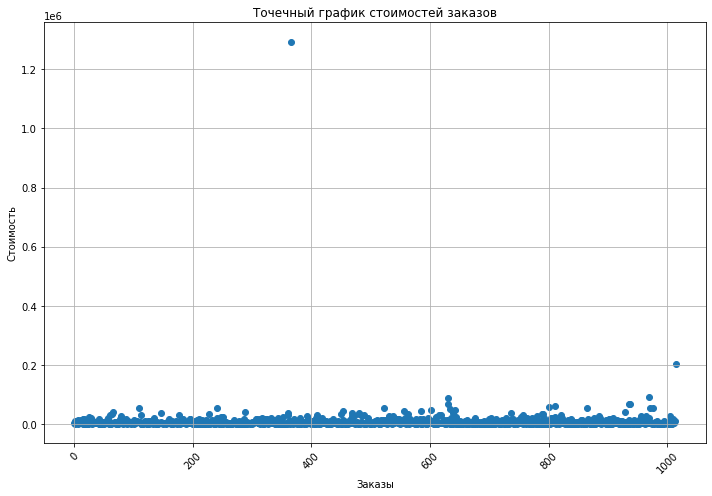

In [54]:
x_values = pd.Series(range(0,len(orders_corrected['revenue'])))

plt.figure(figsize=(10, 7))

plt.scatter(x_values, orders_corrected['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')

plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(np.arange(9, 1300000, 200000))
plt.tight_layout()

plt.show();

Мы видим аномальный заказ стоимостью более миллиона. Видимо, он и повлиял на всплеск на графиках выручки и среднего чека, который произошел 19 августа. Что касается других значений, то стоимость основной массы заказов не превышает 100 тысяч.

#### 95-й и 99-й перцентили стоимости заказов. Граница для аномальных заказов

In [55]:
np.percentile(orders_corrected['revenue'], [95, 99])

array([26832., 53904.])

Выберем границей для аномальных заказов **99-й** перцентиль, т.е. исключим те заказы, которые стоят более **53904**.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным

**Нулевая гипотеза**: различий в среднем количестве заказов между группами нет.  
**Альтернативная гипотеза**: есть различия в среднем количестве заказов между группами.

Объявим переменные **sampleA** и **sampleB**, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули:

In [56]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05
p_value = st.mannwhitneyu(sampleA, sampleB)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между средним количеством заказов в группах есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост среднего количества заказов группы В к А: {0:.3%}".format(sampleB.mean() / sampleA.mean()-1))

P-value: 0.011
Отвергаем нулевую гипотезу: между средним количеством заказов в группах есть разница
Относительный прирост среднего количества заказов группы В к А: 15.768%


По "сырым" данным в среднем числе заказов групп **А** и **В** есть статистически значимые различия.

#### Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным

**Нулевая гипотеза**: различий в среднем чеке заказа между группами нет.  
**Альтернативная гипотеза**: есть различия в среднем чеке заказа между группами.

In [57]:
check_A = orders_corrected[orders_corrected['group']=='A']['revenue']
check_B = orders_corrected[orders_corrected['group']=='B']['revenue']

alpha = 0.05
p_value = st.mannwhitneyu(check_A, check_B)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между средними чеками в группах есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки групп разными")
    
print("Относительный прирост среднего чека группы В к А: {0:.3%}".format(check_B.mean() / check_A.mean()-1))

P-value: 0.820
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки групп разными
Относительный прирост среднего чека группы В к А: 28.769%


Поскольку **P-value** значительно больше **5%**, нет причин отвергать нулевую гипотезу, что означает, что в среднем чеке нет различий, хотя в тестовой группе **B** он и больше почти на **29%**.

Наблюдаемое различие средних чеков в **29%** не является статистически значимым, поскольку при проведении непараметрического теста Уилкоксона-Манна-Уитни не удалось отвергнуть нулевую гипотезу - значение **P-value** получилось значительно больше **5%**.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным¶

Выше было получено, что в наших данных нет пользователей с аномальным числом заказов. Поэтому данный раздел можно оставить пустым.

Примем за аномальных пользователей тех, кто совершил более 2-х заказов или совершил заказ дороже **53904** рублей:

In [58]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_corrected[orders_corrected['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

16

Получилось 16 аномальных пользователей.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным.

- H0 - Нет  различий в среднем количестве заказов на посетителя между группами;
- H1 - Есть различия между группами в среднем количестве заказов на посетителя.

In [59]:
# выборка количества заказов по пользователям группы А:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# выборка количества заказов по пользователям группы В:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим критерий Манна-Уитни к полученным выборкам:
alpha = 0.05
p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между средним количеством заказов в группах есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост среднего количества заказов группы В к А: {0:.3%}"
      .format(sampleBFiltered.mean() / sampleAFiltered.mean()-1))

P-value: 0.007
Отвергаем нулевую гипотезу: между средним количеством заказов в группах есть разница
Относительный прирост среднего количества заказов группы В к А: 18.700%


Мы получили относительный прирост среднего числа заказов на пользователя в **18.7%**, который является статистически значимым, поскольку при проведении непараметрического теста Уилкоксона-Манна-Уитни мы  отвергаем нулевую гипотезу - значение **P-value** стало даже еще меньше, чем было на "сырых" данных.

#### Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным

Будем считать аномальными заказами только те, которые дороже **53904**. Это менее одного процента всех заказов

In [60]:
abnormalOrders = (orders_corrected[orders_corrected['revenue'] > 53904]['transaction_id']
                 .drop_duplicates()
                 .sort_values()
                )

abnormalOrders.shape[0]

9

Посчитаем статистическую значимость различий в среднем чеке после удаления аномальных пользователей.

**Нулевая гипотеза**: различий в среднем чеке для "очищенных" заказов нет для контрольной и тестовой групп.   
**Альтернативная гипотеза**: есть различия между группами в среднем чеке "очищенных" заказов.

In [61]:
orders_A_clear = (orders_corrected[np.logical_and(orders_corrected['group'] == 'A'
                                                  , np.logical_not(orders_corrected['transaction_id']
                                                      .isin(abnormalOrders)))]['revenue']
                 )
orders_B_clear = (orders_corrected[np.logical_and(orders_corrected['group'] == 'B'
                                                  , np.logical_not(orders_corrected['transaction_id']
                                                      .isin(abnormalOrders)))]['revenue']
                 )


alpha = 0.05
p_value = st.mannwhitneyu(orders_A_clear, orders_B_clear)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между средними чеками в группах есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки групп разными для очищенных данных")
    
print("Относительный прирост среднего чека группы В к А: {0:.3%}".format(orders_B_clear.mean() / orders_A_clear.mean()-1))


P-value: 0.890
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки групп разными для очищенных данных
Относительный прирост среднего чека группы В к А: -3.126%


In [62]:
orders_A_clear = (orders_corrected[np.logical_and(orders_corrected['group'] == 'A'
                                                  , np.logical_not(orders_corrected['visitor_id']
                                                      .isin(abnormalUsers)))]['revenue']
                 )
orders_B_clear = (orders_corrected[np.logical_and(orders_corrected['group'] == 'B'
                                                  , np.logical_not(orders_corrected['visitor_id']
                                                      .isin(abnormalUsers)))]['revenue']
                 )


alpha = 0.05
p_value = st.mannwhitneyu(orders_A_clear, orders_B_clear)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между средними чеками в группах есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки групп разными для очищенных данных")
    
print("Относительный прирост среднего чека группы В к А: {0:.3%}".format(orders_B_clear.mean() / orders_A_clear.mean()-1))


P-value: 0.777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки групп разными для очищенных данных
Относительный прирост среднего чека группы В к А: -3.197%


Мы получили относительную убыль среднего чека в **-3.2%**, которая не является статистически значимой, поскольку значение **P-value** гораздо больше **5%**.

#### График кумулятивной выручки по группам по "очищенным" данным

Интересно теперь посмотреть, как будет выглядеть график кумулятивной выручки, если исключить заказы дороже **53904**. Напомним, что на "сырых" данных мы наблюдали резкий скачок 19 августа для тестовой группы.

In [63]:
orders_no_splash = orders_corrected.query('revenue<=53904')

In [64]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_corrected[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_new = (datesGroups
                    .apply(lambda x: orders_no_splash[np.logical_and(orders_no_splash['date'] <= x['date']
                                                                     , orders_no_splash['group'] == x['group'])]
                           .agg({'date' : 'max'
                                 , 'group' : 'max'
                                 , 'transaction_id' : 'nunique'
                                 , 'visitor_id' : 'nunique'
                                 , 'revenue' : 'sum'})
                           , axis=1)
                    .sort_values(by=['date','group'])
                   )

# присваиваем столбцам понятные названия

orders_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

orders_new.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


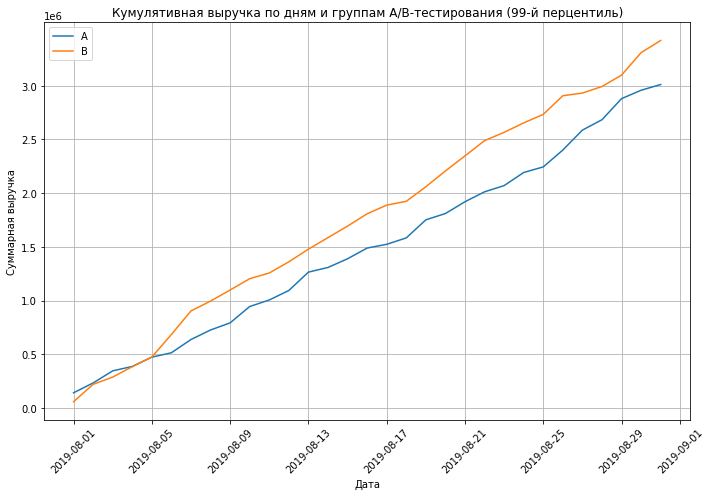

In [65]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
orders_new_A = orders_new[orders_new['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
orders_new_B = orders_new[orders_new['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 7))

# Строим график выручки группы А
plt.plot(orders_new_A['date'], orders_new_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(orders_new_B['date'], orders_new_B['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам А/В-тестирования (99-й перцентиль)')
plt.xlabel('Дата')
plt.ylabel('Суммарная выручка')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(0, 3500000, 500000))

plt.show();

Графики кумулятивной выручки почти выровнялись. Есть небольшое преимущество у тестовой группы **В**, у которой, правда, 7 августа есть еще один небольшой скачок. Давайте попробуем исключить до **5%** самых дорогих заказов. Напомним, что границей для них служит значение **26832**:

In [66]:
orders_no_splash_95 = orders_corrected.query('revenue<=26832')

In [67]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_new_95 = (datesGroups
                    .apply(lambda x: orders_no_splash_95[np.logical_and(orders_no_splash_95['date'] <= x['date']
                                                                     , orders_no_splash_95['group'] == x['group'])]
                           .agg({'date' : 'max'
                                 , 'group' : 'max'
                                 , 'transaction_id' : 'nunique'
                                 , 'visitor_id' : 'nunique'
                                 , 'revenue' : 'sum'})
                           , axis=1)
                    .sort_values(by=['date','group'])
                   )

# присваиваем столбцам понятные названия

orders_new_95.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

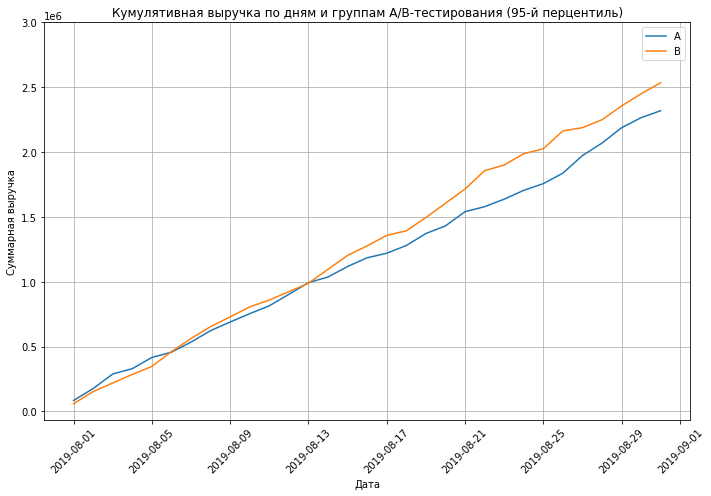

In [68]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
orders_new_A_95 = orders_new_95[orders_new_95['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
orders_new_B_95 = orders_new_95[orders_new_95['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 7))

# Строим график выручки группы А
plt.plot(orders_new_A_95['date'], orders_new_A_95['revenue'], label='A')

# Строим график выручки группы B
plt.plot(orders_new_B_95['date'], orders_new_B_95['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам А/В-тестирования (95-й перцентиль)')
plt.xlabel('Дата')
plt.ylabel('Суммарная выручка')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(0, 3500000, 500000))

plt.show();

Теперь графики превратились в почти прямые линии и мы видим, что есть небольшая тенденция  более быстрого накопления выручки группой **В**. Выше мы получали, что  группа **В** характеризуется лучшей конверсией, т.е. в ней фиксируется больше заказов в пересчете на одного посетителя. Это, видимо, и объясняет более быстрый рост кумулятивной выручки.

#### График кумулятивного среднего чека по группам на "очищенных" данных

Посмотрим на график среднего чека без аномальных заказов. Сделаем это сразу для 95-го перцентиля:

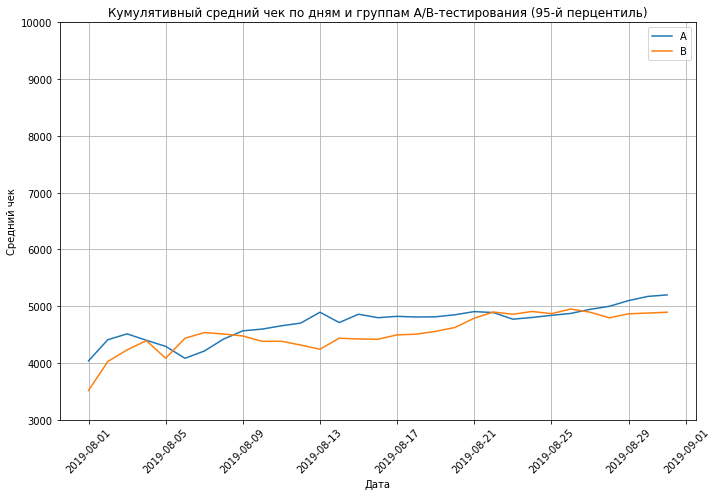

In [69]:
plt.figure(figsize=(10, 7))

plt.plot(orders_new_A_95['date'], orders_new_A_95['revenue']/orders_new_A_95['orders'], label='A')
plt.plot(orders_new_B_95['date'], orders_new_B_95['revenue']/orders_new_B_95['orders'], label='B')

plt.title('Кумулятивный средний чек по дням и группам А/В-тестирования (95-й перцентиль)')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(3000, 11000, 1000))

plt.show();

Мы видим, что после очистки, по среднему чеку группы не отличаются.

#### График относительного изменения кумулятивного среднего чека группы В к группе А (95-й перцентиль)

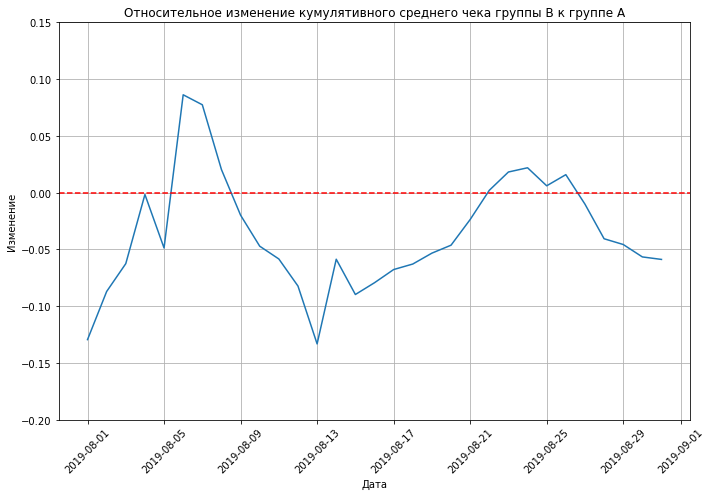

In [70]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (orders_new_A_95
                           .merge(orders_new_B_95
                                  , left_on='date'
                                  , right_on='date'
                                  , how='left'
                                  , suffixes=['A', 'B'])
                          )

plt.figure(figsize=(10, 7))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.yticks(np.arange(-0.2, 0.2, 0.05))

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.show();

Относительное изменение среднего чека без **5%** дорогих заказов колеблется в районе нуля. Необходимо накопить больше данных, чтобы увидеть на каком уровне, выше или ниже нуля, стабилизируется линия.

#### Решение по результатам А/В-теста

Итак, пришло время собрать всю информацию в единое целое и принять решение по дальнейшей судьбе теста: продолжить его или остановить, зафиксировав победу одной из групп или отсутствие различий между группами.

Мы воспользовались двумя онлайн-сервисами для определения минимального размера выборки и длительности проведения теста. В обоих случаях было получено, что данных для уверенного ответа на вопрос о результативности теста недостаточно. Необходимо продлить эксперимент еще хотя бы на **10 дней**.

Были изучены графики кумулятивной выручки, кумулятивного среднего чека и относительного изменения кумулятивного среднего чека, как для "сырых" данных, так и для "очищенных". "Очистка" данных выполнялась путем исключения **5%** самых дорогих заказов. До очистки лидировала тестовая группа **В**, а после очистки мы получили, что разницы между группами по среднему чеку не видно. По кумулятивной выручке есть небольшое преимущество у группы **В** из-за лучшей конверсии.

По графикам конверсии группа **В** опережает группу **А** примерно на **15%**.

В среднем числе заказов групп **А** и **В** получены статистически значимые различия.

По среднему чеку не получилось отвергнуть нулевую гипотезу, т.е. нет оснований считать средние чеки групп для сырых и очищенных данных разными.

По итогу всего вышесказанного, мы получили значимую прибавку в конверсии для группы **В**, но по среднему чеку разницы не увидели. Т.е. в целом, получен положительный результат, но пока метрики не стабилизировались, мы не можем точно оценить размер выигрыша. Чтобы исключить фактор сезонности, важно следить за стабилизацией относительных изменений метрик.

**Решение**: продлить эксперимент еще минимум на **10** дней, чтобы получить стабильный уровень относительных изменений кумулятивной конверсии и кумулятивного среднего чека.

**Решение**: можно остановить эксперимент и признать его успешным, т.к. группа **В** показала значимую прибавку конверсии.

<a id="4"></a>
### Выводы

* при использовании фреймворка **ICE** наилучший ранг получила гипотеза о скидке ко дню рождения, второй стала гипотеза о добавлении двух новых каналов для привлечения трафика, третьей - о добавлении формы подписки на все основные страницы;
* при использовании фреймворка **RICE** наилучший ранг получила гипотеза о добавлении формыподписки на все основные страницы, второй стала гипотеза о добавлении блоков рекомендаций товаров на сайт интернет магазина, третьей - о добавлении двух новых каналов для привлечения трафика;
* при использовании фреймворка **RICE** вместо **ICE** гипотезы, имеющие больший охват аудитории улучшили свой приоритет, а меньший охват - ухудшили;
* в результате А/В-теста получена значимая прибавка в конверсии для группы **В**;
* в результате А/В-теста не удалось увидеть значимой разницы в среднем чеке;
* принято решение об остановке эксперимента и признании его успешным, гипотеза сработала в нужном направлении.